In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Print multiple output per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
# Load the CSV files
total_population = pd.read_csv('Total_Population.csv')
male_population = pd.read_csv('Male_Population.csv')
female_population_percentage = pd.read_csv('Female_Population.csv')
age_group_0_14 = pd.read_csv('0_14_age_group.csv')
age_group_15_64 = pd.read_csv('15_64_age_group.csv')

# Functions to Analyse
1. plot_gender_distribution('country name') - takes in country name as input and gives the distribution bar plot of genders in the country over years as output
2. plot_age_distribution('country name') - takes in country name as input and gives the age distribution bar plot of people over years as output

In [4]:
def plot_gender_distribution(country_name):
    # Filter the data for the specified country
    total_population_country = total_population[total_population['Country Name'] == country_name]
    male_population_country = male_population[male_population['Country Name'] == country_name]
    female_percentage_country = female_population_percentage[female_population_percentage['Country Name'] == country_name]

    # Extract the year columns (all columns except the first four)
    years = total_population.columns[4:]

    # Calculate the female population for each year
    total_population_country_years = total_population_country[years].astype(float).values.flatten()
    male_population_country_years = male_population_country[years].astype(float).values.flatten()
    female_percentage_country_years = female_percentage_country[years].astype(float).values.flatten()
    female_population_country_years = total_population_country_years * female_percentage_country_years / 100

    # Create the bar chart
    bar_width = 0.35
    index = range(len(years))

    plt.figure(figsize=(14, 8))
    plt.bar(index, male_population_country_years, bar_width, label='Male Population')
    plt.bar([i + bar_width for i in index], female_population_country_years, bar_width, label='Female Population')

    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.title(f'Male and Female Population Variation Over Years in {country_name}')
    plt.xticks([i + bar_width / 2 for i in index], years, rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

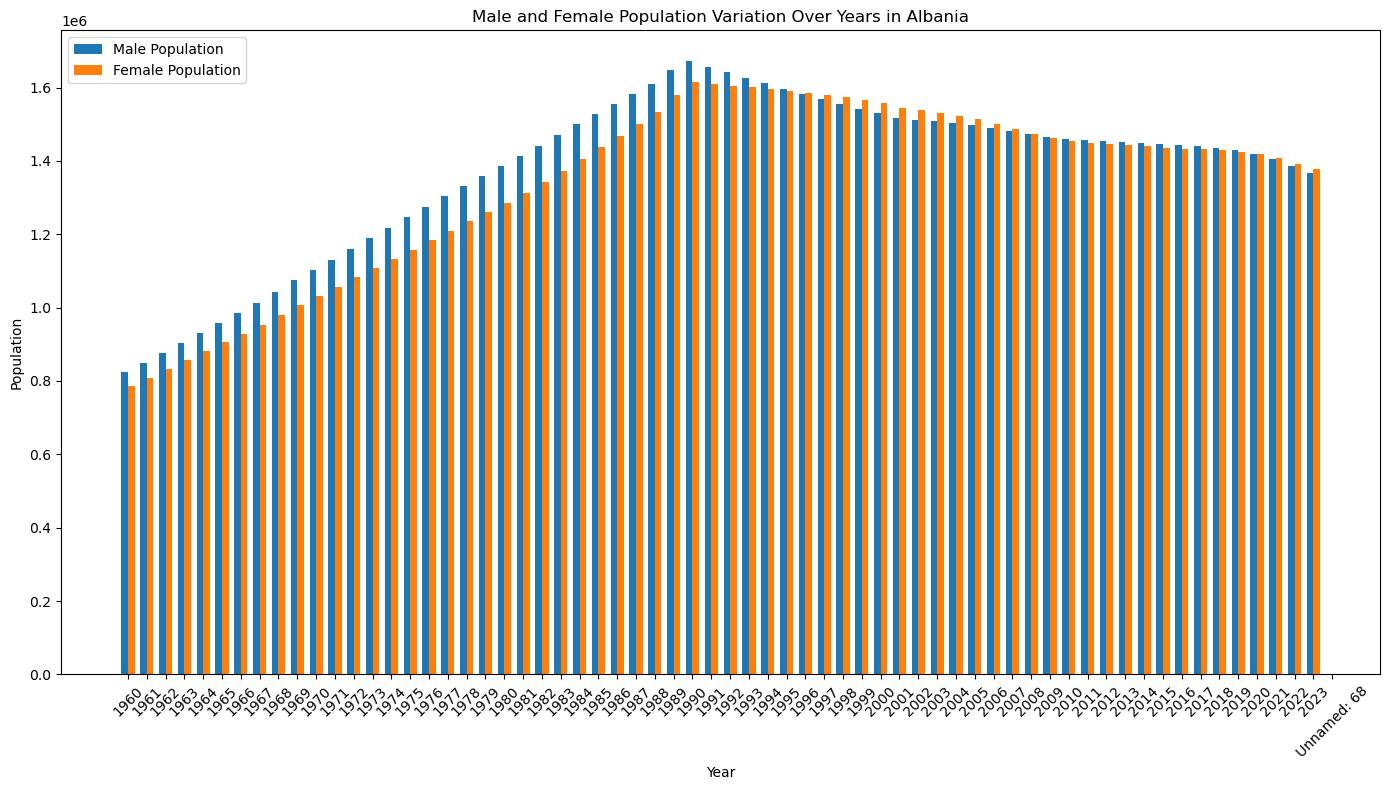

In [5]:
# Usage example
plot_gender_distribution('Albania')

In [6]:
def plot_age_distribution(country_name):
    # Filter the data for the specified country
    total_population_country = total_population[total_population['Country Name'] == country_name]
    age_group_0_14_country = age_group_0_14[age_group_0_14['Country Name'] == country_name]
    age_group_15_64_country = age_group_15_64[age_group_15_64['Country Name'] == country_name]

    # Extract the year columns (all columns except the first four)
    years = total_population.columns[4:]

    # Calculate the population for each age group for each year
    total_population_years = total_population_country[years].astype(float).values.flatten()
    age_group_0_14_percent = age_group_0_14_country[years].astype(float).values.flatten()
    age_group_15_64_percent = age_group_15_64_country[years].astype(float).values.flatten()

    age_group_0_14_population = total_population_years * age_group_0_14_percent / 100
    age_group_15_64_population = total_population_years * age_group_15_64_percent / 100
    age_group_65_plus_population = total_population_years - (age_group_0_14_population + age_group_15_64_population)

    # Create the bar chart
    bar_width = 0.25
    index = range(len(years))

    plt.figure(figsize=(14, 8))
    plt.bar(index, age_group_0_14_population, bar_width, label='Age 0-14')
    plt.bar([i + bar_width for i in index], age_group_15_64_population, bar_width, label='Age 15-64')
    plt.bar([i + 2 * bar_width for i in index], age_group_65_plus_population, bar_width, label='Age 65+')

    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.title(f'Age Group Population Distribution Over Years in {country_name}')
    plt.xticks([i + bar_width for i in index], years, rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

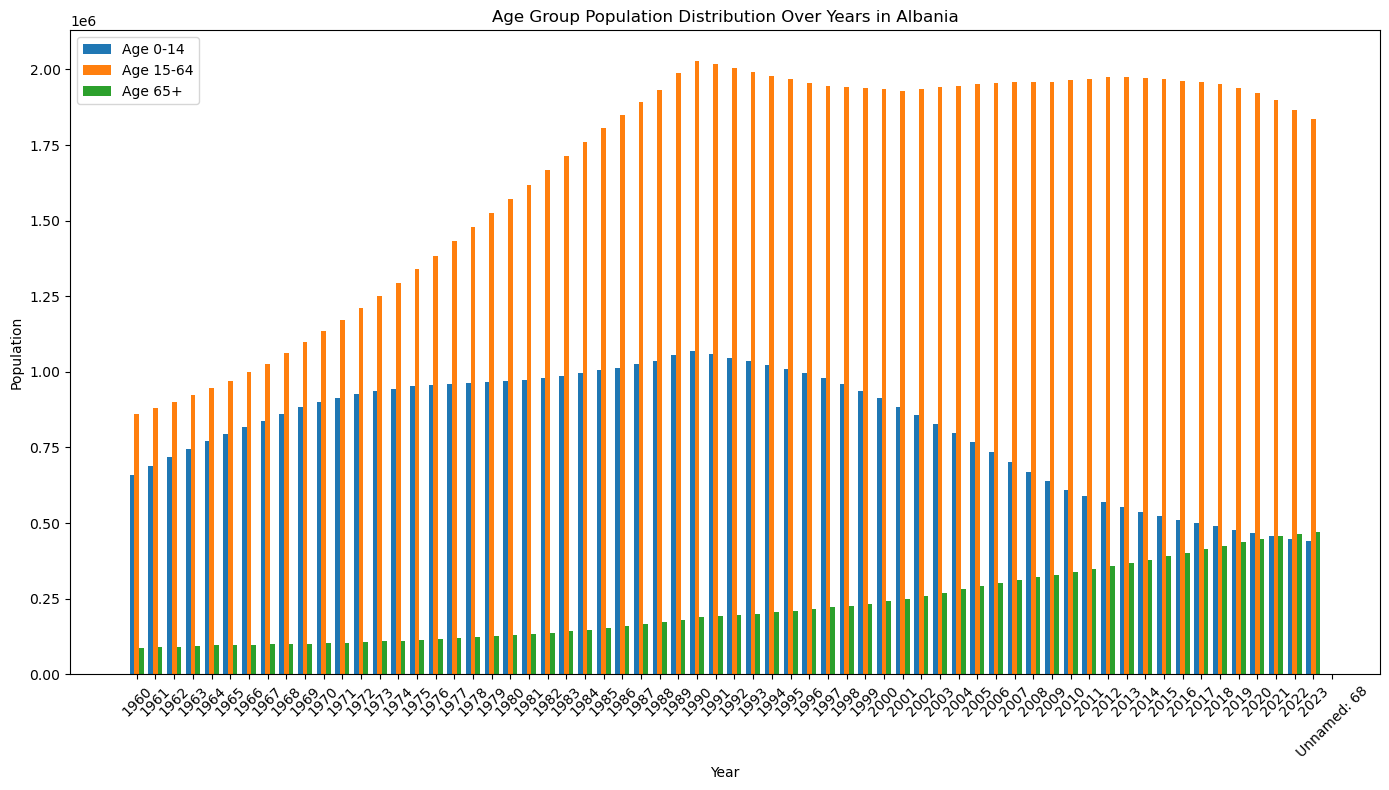

In [7]:
# Usage example
plot_age_distribution('Albania')

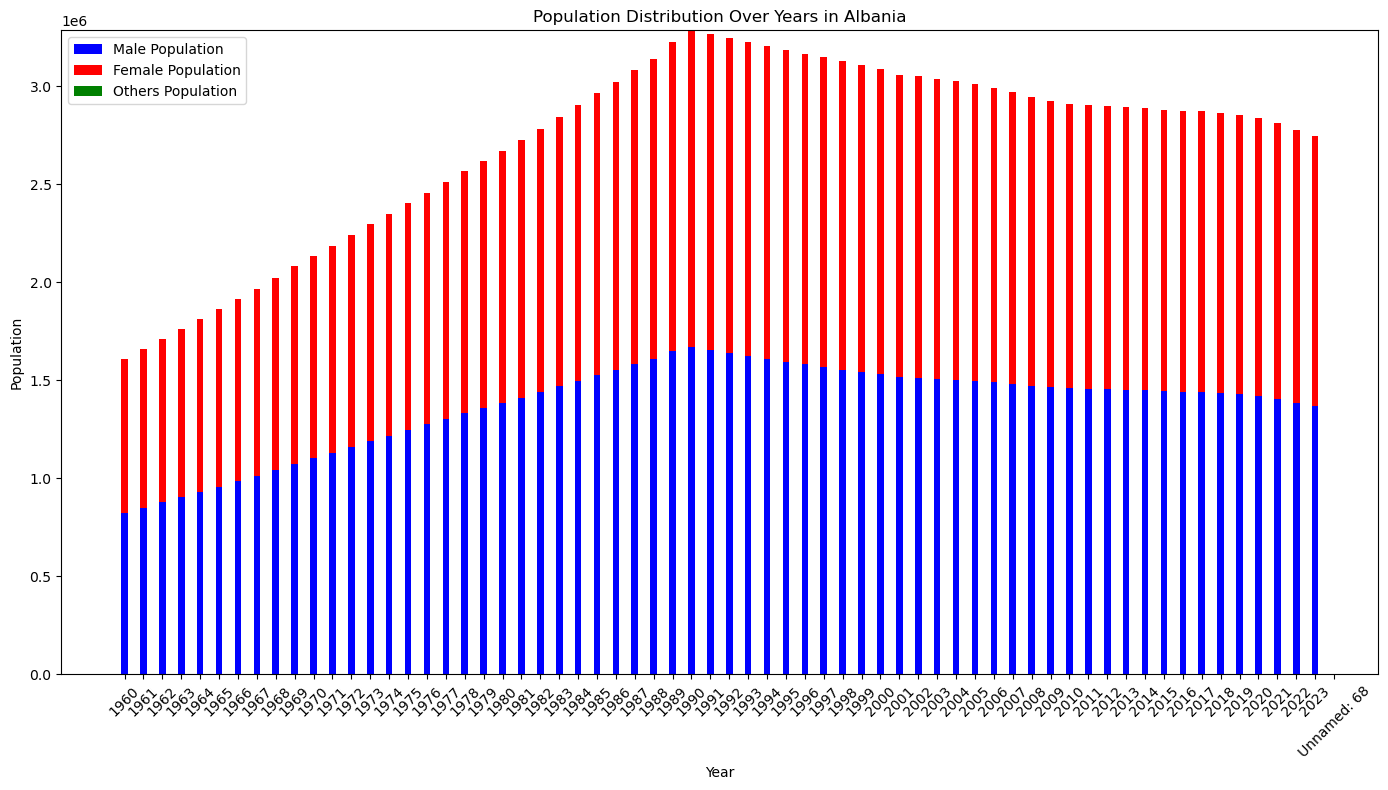

In [8]:
def plot_population_distribution(country_name):
    # Filter the data for the specified country
    total_population_country = total_population[total_population['Country Name'] == country_name]
    male_population_country = male_population[male_population['Country Name'] == country_name]
    female_percentage_country = female_population_percentage[female_population_percentage['Country Name'] == country_name]

    # Extract the year columns (all columns except the first four)
    years = total_population.columns[4:]

    # Calculate the female population for each year
    total_population_country_years = total_population_country[years].astype(float).values.flatten()
    male_population_country_years = male_population_country[years].astype(float).values.flatten()
    female_percentage_country_years = female_percentage_country[years].astype(float).values.flatten()
    female_population_country_years = total_population_country_years * female_percentage_country_years / 100

    # Calculate the "others" population for each year
    others_population_country_years = total_population_country_years - (male_population_country_years + female_population_country_years)

    # Create the stacked bar chart
    bar_width = 0.35
    index = range(len(years))

    plt.figure(figsize=(14, 8))
    plt.bar(index, male_population_country_years, bar_width, label='Male Population', color='blue')
    plt.bar(index, female_population_country_years, bar_width, bottom=male_population_country_years, label='Female Population', color='red')
    plt.bar(index, others_population_country_years, bar_width, bottom=male_population_country_years + female_population_country_years, label='Others Population', color='green')

    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.title(f'Population Distribution Over Years in {country_name}')
    plt.xticks(index, years, rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Usage example
plot_population_distribution('Albania')

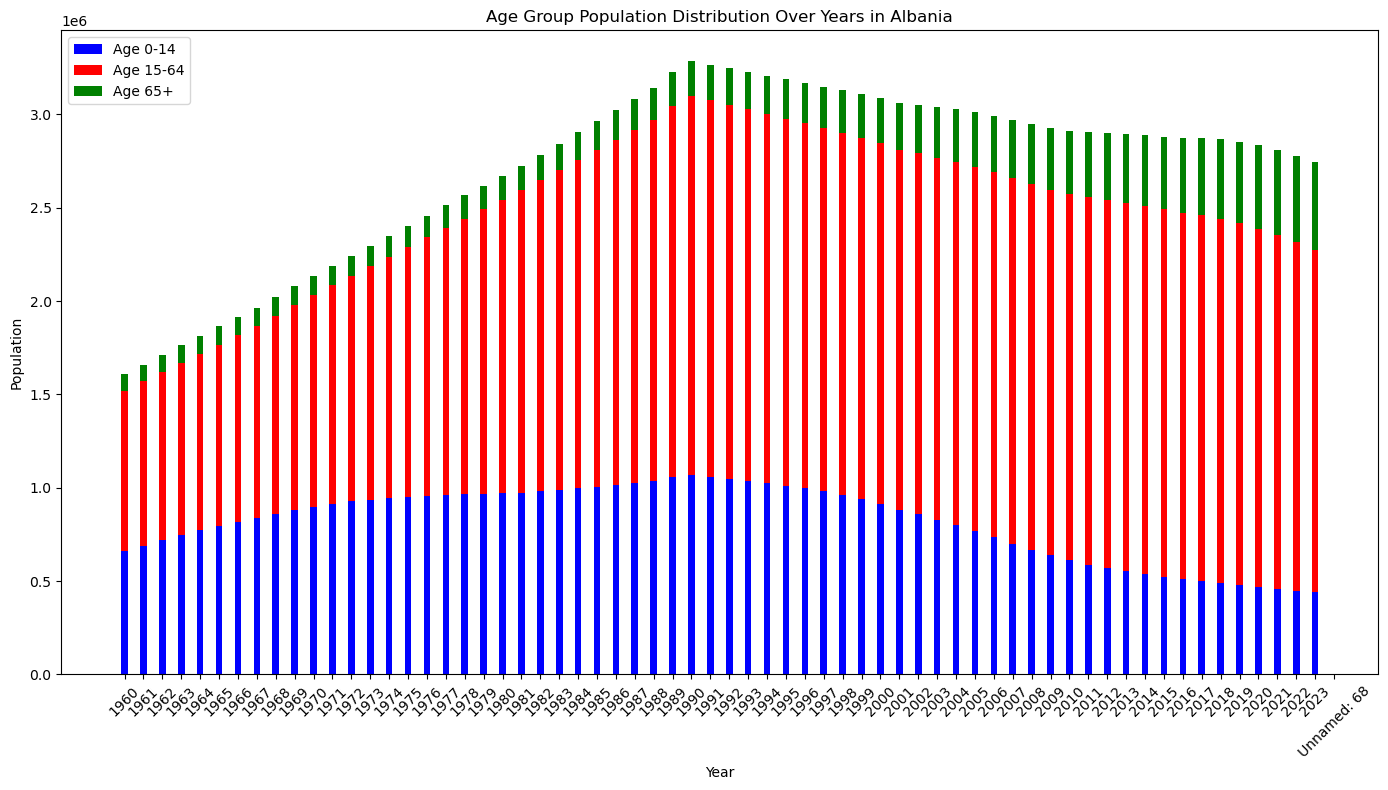

In [10]:
def plot_age_group_distribution(country_name):
    # Filter the data for the specified country
    total_population_country = total_population[total_population['Country Name'] == country_name]
    age_group_0_14_country = age_group_0_14[age_group_0_14['Country Name'] == country_name]
    age_group_15_64_country = age_group_15_64[age_group_15_64['Country Name'] == country_name]

    # Extract the year columns (all columns except the first four)
    years = total_population.columns[4:]

    # Calculate the population for each age group for each year
    total_population_years = total_population_country[years].astype(float).values.flatten()
    age_group_0_14_percent = age_group_0_14_country[years].astype(float).values.flatten()
    age_group_15_64_percent = age_group_15_64_country[years].astype(float).values.flatten()

    age_group_0_14_population = total_population_years * age_group_0_14_percent / 100
    age_group_15_64_population = total_population_years * age_group_15_64_percent / 100
    age_group_65_plus_population = total_population_years - (age_group_0_14_population + age_group_15_64_population)

    # Create the stacked bar chart
    bar_width = 0.35
    index = range(len(years))

    plt.figure(figsize=(14, 8))
    plt.bar(index, age_group_0_14_population, bar_width, label='Age 0-14', color='blue')
    plt.bar(index, age_group_15_64_population, bar_width, bottom=age_group_0_14_population, label='Age 15-64', color='red')
    plt.bar(index, age_group_65_plus_population, bar_width, bottom=age_group_0_14_population + age_group_15_64_population, label='Age 65+', color='green')

    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.title(f'Age Group Population Distribution Over Years in {country_name}')
    plt.xticks(index, years, rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Usage example
plot_age_group_distribution('Albania')